4431872/4422102 [==============================] - 0s 0us/step


<function matplotlib.pyplot.show>

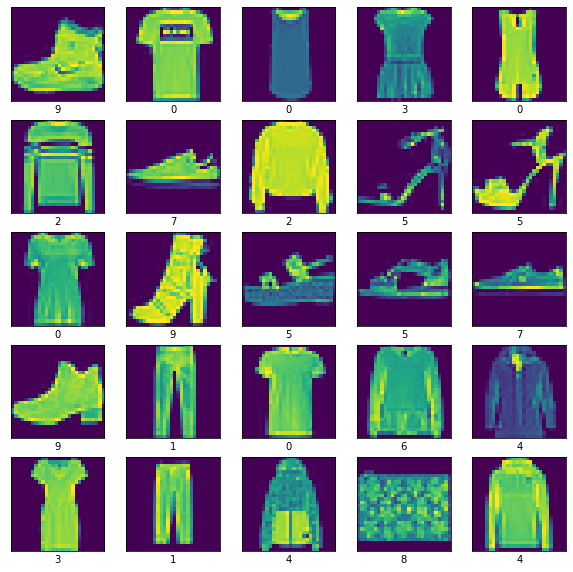

In [ ]:
from keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.xlabel(y_train[i])
plt.show

In [13]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [ ]:
from tensorflow.keras.utils import to_categorical
x_train=x_train.astype('float32') #gán kiểu dữ liệu
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [ ]:
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input, Dense
model=Sequential()

In [ ]:
from keras.layers.core.flatten import Flatten
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='uniform'))
model.add(Dense(10,activation='softmax'))

In [ ]:
from tensorflow.keras.optimizers import SGD
opt = SGD(lr = 0.01, momentum = 0.9)
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
history = model.fit(x_train,y_train,batch_size=64,epochs = 50,verbose = 1,validation_data=[x_test,y_test])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
938/938 [==============================] - 5s 4ms/step - loss: 1.6147 - accuracy: 0.3686 - val_loss: 1.0915 - val_accuracy: 0.5784
Epoch 2/50
938/938 [==============================] - 3s 3ms/step - loss: 0.8645 - accuracy: 0.6666 - val_loss: 0.7540 - val_accuracy: 0.7024
Epoch 3/50
938/938 [==============================] - 3s 3ms/step - loss: 0.6801 - accuracy: 0.7364 - val_loss: 0.6643 - val_accuracy: 0.7508
Epoch 4/50
938/938 [==============================] - 3s 3ms/step - loss: 0.6109 - accuracy: 0.7641 - val_loss: 0.5979 - val_accuracy: 0.7637
Epoch 5/50
938/938 [==============================] - 3s 3ms/step - loss: 0.5480 - accuracy: 0.7953 - val_loss: 0.5586 - val_accuracy: 0.7961
Epoch 6/50
938/938 [==============================] - 4s 4ms/step - loss: 0.4904 - accuracy: 0.8226 - val_loss: 0.5258 - val_accuracy: 0.8165
Epoch 7/50
938/938 [==============================] - 3s 3ms/step - loss: 0.4337 - accuracy: 0.8490 - val_loss: 0.4769 - val_accuracy: 0.8366
Epoch 

In [14]:
model.save('fashion.h5')


In [15]:
from tensorflow.keras.models import load_model
model1=load_model('fashion.h5')

array([8])

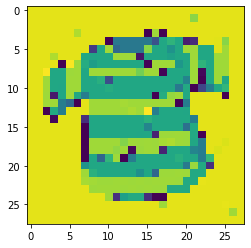

In [18]:
img=load_img('/content/pngtree-t-shirt-t-shirt-clothes-clothing-png-image_3898766.jpg',target_size=(28,28),color_mode="grayscale")
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,784)
img=img/255
np.argmax(model.predict(img),axis=1)

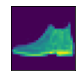

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


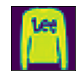

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


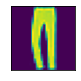

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


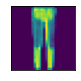

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


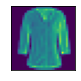

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


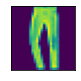

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


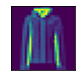

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


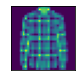

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


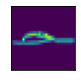

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [20]:
y_pred = model.predict(x_test)
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_test[i])
  plt.xticks([])
  plt.yticks([]) 
  plt.show()
  print(np.round(y_pred[i]))